# Bank Telemarketing Campaign Case Study.

### Problem Statement:

The bank provides financial services/products such as savings accounts, current accounts, debit cards, etc. to its customers. In order to increase its overall revenue, the bank conducts various marketing campaigns for its financial products such as credit cards, term deposits, loans, etc. These campaigns are intended for the bank’s existing customers. However, the marketing campaigns need to be cost-efficient so that the bank not only increases their overall revenues but also the total profit. 

The bank conducted a telemarketing campaign for one of its financial products ‘Term Deposits’ to help foster long-term relationships with existing customers. The dataset contains information about all the customers who were contacted during a particular year to open term deposit accounts.

##### What is the term Deposit?

Term deposits also called fixed deposits, are the cash investments made for a specific time period ranging from 1 month to 5 years for predetermined fixed interest rates. The fixed interest rates offered for term deposits are higher than the regular interest rates for savings accounts. The customers receive the total amount (investment plus the interest) at the end of the maturity period. Also, the money can only be withdrawn at the end of the maturity period. Withdrawing money before that will result in an added penalty associated, and the customer will not receive any interest returns.

Our target is to do end to end EDA on this bank telemarketing campaign data set to infer knowledge that where bank has to put more effort to improve it's positive response rate.

###### Objective:
To understand the factors leading to a Response.

- Import Warning and Necessary Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np    #for performing numerical operations on a dataset
import pandas as pd    #to deal with dataframes in Python
import matplotlib.pyplot as plt    #for data visualization in Python
import seaborn as sns    #for data visualization in Python
%matplotlib inline

#### Data Wrangling

- Reading the data set

In [4]:
inp0 = pd.read_csv('bank_marketing_updated_v1.csv')
inp0.head()

,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,customer id and age.,NaN,Customer salary and balance.,NaN,Customer marital status and job with education...,NaN,particular customer before targeted or not,NaN,Loan types: loans or housing loans,NaN,Contact type,NaN,month of contact,duration of call,NaN,NaN,NaN,outcome of previous contact,response of customer after call happned
1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no


- Reading the data set without unecessary headers

In [5]:
inp0 = pd.read_csv('bank_marketing_updated_v1.csv', skiprows = 2)
inp0.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


- Customerid column in the dataset is of no use to us. We will drop it.

In [6]:
inp0.drop('customerid', axis=1, inplace=True)
inp0.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


- We can observe the the jobedu column, we will segregate it into job and education columns separately. 
- It will be helpful in our analysis later. Also we will drop the jobedu column as it will be of no use after this.

In [7]:
inp0['job'] = inp0.jobedu.apply(lambda x: x.split(',')[0])    #applying function to split content of jobedu column 
inp0['education'] = inp0.jobedu.apply(lambda x: x.split(',')[1])

inp0.drop('jobedu', axis=1, inplace=True) # dropping 'jobedu' column after segregating and creating two different columns
inp0.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


- Checking the shape of dataset and data types of variables

In [8]:
inp0.shape

(45211, 19)

In [9]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45191 non-null  float64
 1   salary     45211 non-null  int64  
 2   balance    45211 non-null  int64  
 3   marital    45211 non-null  object 
 4   targeted   45211 non-null  object 
 5   default    45211 non-null  object 
 6   housing    45211 non-null  object 
 7   loan       45211 non-null  object 
 8   contact    45211 non-null  object 
 9   day        45211 non-null  int64  
 10  month      45161 non-null  object 
 11  duration   45211 non-null  object 
 12  campaign   45211 non-null  int64  
 13  pdays      45211 non-null  int64  
 14  previous   45211 non-null  int64  
 15  poutcome   45211 non-null  object 
 16  response   45181 non-null  object 
 17  job        45211 non-null  object 
 18  education  45211 non-null  object 
dtypes: float64(1), int64(6), object(12)
memory usa

- It is visible that datatype for 'age' columns is  not correct.
- Before correcting the data type we will check for null values in data set and work on them.

In [10]:
inp0.isnull().sum()    #Checking for null values is data set.

age          20
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month        50
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
job           0
education     0
dtype: int64

- As it is clear from above info we have null values in 'age', 'month' and 'response' column respectively
- Calculating the percentage of missing values for mentioned columns

In [11]:
float(20*100.0/45211)    # Percentage of missing values in 'age' cloumn 

0.04423702196368141

In [12]:
float(50*100.0/45211)    # Percentage of missing values in 'month' cloumn

0.11059255490920351

In [13]:
float(30*100.0/45211)    # Percentage of missing values in 'response' cloumn

0.06635553294552211

- The percentage of missing values in the 'age' and 'response' column is very less, we will drop these missing records
- Since 'response' is our Target variable, it is better if not imputed.

- Percentage of missing values in 'month' column is above 10% so removing them may hamper our analysis. 
- Imputing it with mode of column would be ideal since it is categorical in nature. 

- After removing and imputing data will be stored in a new dataframe as a copy

In [14]:
inp1 = inp0[~inp0.age.isnull()].copy()    # removing null values from 'age' column and storing in new datagframe
inp1.shape

(45191, 19)

In [15]:
inp1 = inp1[~inp1.response.isnull()]    # removing null values from 'response' column
inp1.shape

(45161, 19)

In [16]:
inp1.month.mode()    # getting the mode of 'month' column

0    may, 2017
dtype: object

In [17]:
month_mode = inp1.month.mode()[0]    # Getting the exact mode value for ease in imputation
month_mode

'may, 2017'

In [18]:
inp1.month.value_counts(normalize=True)    # confirming if mode is correct

may, 2017    0.304383
jul, 2017    0.152579
aug, 2017    0.138104
jun, 2017    0.118086
nov, 2017    0.087828
apr, 2017    0.064907
feb, 2017    0.058633
jan, 2017    0.031079
oct, 2017    0.016337
sep, 2017    0.012769
mar, 2017    0.010552
dec, 2017    0.004744
Name: month, dtype: float64

In [19]:
inp1.month.fillna(month_mode, inplace=True)    # Filling null values of 'month' column with mode

In [20]:
inp1.month.value_counts(normalize=True)    
#confirming for imputation of value. It is observed that percentage has increased for 'may, 2017'

may, 2017    0.305153
jul, 2017    0.152410
aug, 2017    0.137951
jun, 2017    0.117956
nov, 2017    0.087731
apr, 2017    0.064835
feb, 2017    0.058568
jan, 2017    0.031044
oct, 2017    0.016319
sep, 2017    0.012754
mar, 2017    0.010540
dec, 2017    0.004739
Name: month, dtype: float64

In [21]:
inp1.isnull().sum()    # checking for null values in new data set if present after removing/imputing data

age          0
salary       0
balance      0
marital      0
targeted     0
default      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
job          0
education    0
dtype: int64

In [22]:
inp1.age = inp1.age.astype(int)    # converting 'age' column data type from float to integer

In [23]:
inp1.age.mean()    # checking for average age in the data set

40.93576315847745

- Standardizing values in the data set

In [25]:
# As visible in the 'duration' column we have suffix 'sec' in the value. 

In [26]:
inp1.duration.describe()

count       45161
unique       2646
top       1.5 min
freq          138
Name: duration, dtype: object

In [27]:
inp1.duration.head(10)

0    261 sec
1    151 sec
2     76 sec
3     92 sec
4    198 sec
5    139 sec
6    217 sec
7    380 sec
8     50 sec
9     55 sec
Name: duration, dtype: object

In [28]:
# We'll standardize the values for this column.

In [29]:
inp1.duration = inp1.duration.apply(lambda x: float(x.split()[0])/60 if x.find('sec')>0 else float(x.split()[0]))
# applied fuction in 'duration' column for convert the duration variable into single unit i.e. minutes. 
# selected only numeric value to remove the prefix
# converted data type to float

In [30]:
inp1.duration.head()    # Cross-verifying the changes

0    4.350000
1    2.516667
2    1.266667
3    1.533333
4    3.300000
Name: duration, dtype: float64

In [31]:
inp1.duration.describe()

count    45161.000000
mean         4.302774
std          4.293129
min          0.000000
25%          1.716667
50%          3.000000
75%          5.316667
max         81.966667
Name: duration, dtype: float64

#### Data Analysis

##### Univariate Analysis

- Checking for outliers/Extreme values

In [32]:
inp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45161 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45161 non-null  int32  
 1   salary     45161 non-null  int64  
 2   balance    45161 non-null  int64  
 3   marital    45161 non-null  object 
 4   targeted   45161 non-null  object 
 5   default    45161 non-null  object 
 6   housing    45161 non-null  object 
 7   loan       45161 non-null  object 
 8   contact    45161 non-null  object 
 9   day        45161 non-null  int64  
 10  month      45161 non-null  object 
 11  duration   45161 non-null  float64
 12  campaign   45161 non-null  int64  
 13  pdays      45161 non-null  int64  
 14  previous   45161 non-null  int64  
 15  poutcome   45161 non-null  object 
 16  response   45161 non-null  object 
 17  job        45161 non-null  object 
 18  education  45161 non-null  object 
dtypes: float64(1), int32(1), int64(6), object(11)


In [33]:
inp1.age.describe()    # desccribing the 'age' column

count    45161.000000
mean        40.935763
std         10.618790
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

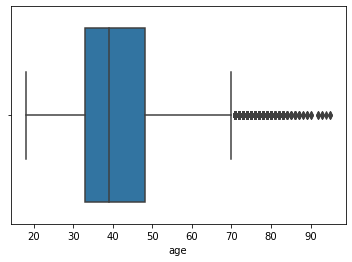

In [34]:
sns.boxplot(inp1.age)    # Box Plot for 'age' column
plt.show()

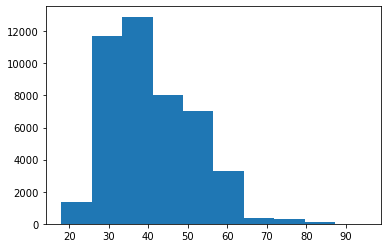

In [35]:
plt.hist(inp1.age)    # Histogram for 'age' column
plt.show()

- It is seen that the 'age' column has outliers, but these can be treated as the normal values of age because any person can be over 70 or 80 years of age. Also, the 70-90 age group is sparsely populated and participate in opening the term deposit account, which is why these set of people fall out of the box plot but they are not outliers and can be considered as normal values.

In [36]:
inp1.salary.describe()    # Describing 'salary' column

count     45161.000000
mean      57004.849317
std       32087.698810
min           0.000000
25%       20000.000000
50%       60000.000000
75%       70000.000000
max      120000.000000
Name: salary, dtype: float64

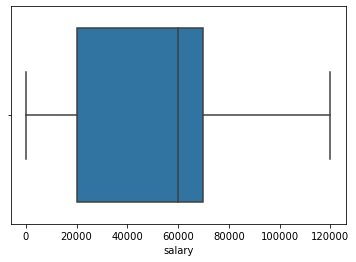

In [37]:
sns.boxplot(inp1.salary)    # Box plot for 'salary' column
plt.show()

In [38]:
inp1.balance.describe()    # describing 'balance' column

count     45161.000000
mean       1362.850690
std        3045.939589
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

- Firstly the minimum is in negative. since this is balance data and people can be in credit hence it can be expected.
- However there is huge difference between the mean and the median value. 

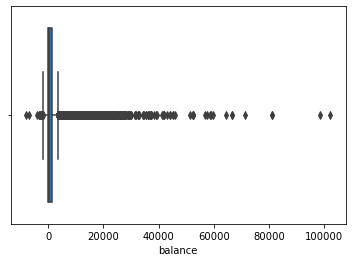

In [39]:
sns.boxplot(inp1.balance)
plt.show()

- Most of the values are in the range. however there are values in extreme range but these are continuous, there isn't a case of sudden rise in number. This can be common for balance as people may be in credit or may have large amount in banks so this is somthing that is not unexpected. this needs further examination.

In [41]:
inp1.balance.quantile([0.5,0.7,0.9,0.95,0.99])

0.50      448.0
0.70     1126.0
0.90     3576.0
0.95     5769.0
0.99    13173.4
Name: balance, dtype: float64

- There is a huge difference between the maximum value and the 95th or 99th quantiles, therefor examining the records that are very high.

In [42]:
inp1[inp1.balance>15000].describe()

,age,salary,balance,day,duration,campaign,pdays,previous
count,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,45.341880,70008.547009,24295.780627,16.022792,4.259022,2.749288,32.475783,0.555556
std,12.114333,34378.272805,12128.560693,8.101819,3.983439,3.036886,87.738924,1.784590
min,23.000000,0.000000,15030.000000,1.000000,0.016667,1.000000,-1.000000,0.000000
25%,35.000000,50000.000000,17074.000000,9.000000,1.700000,1.000000,-1.000000,0.000000
50%,44.000000,60000.000000,20723.000000,18.000000,2.950000,2.000000,-1.000000,0.000000
75%,55.000000,100000.000000,26254.000000,21.000000,5.308333,3.000000,-1.000000,0.000000
max,84.000000,120000.000000,102127.000000,31.000000,27.050000,31.000000,589.000000,23.000000


- It is observed that for these high balance individuals values are on the higher side for age, salary as well as balance. They even have responded positively in previous campaign. These are people who are financially well of. These are not invalid records as these people would be more prone to accepting the campaign. So dropping these would not be a good option.

- Instead of looking at the mean we would look at quantiles/medians/percentiles as these are unaffected by outliers. and we can cap them accordingly.

In [43]:
inp1.pdays.describe()    # describing 'pdays' column

count    45161.000000
mean        40.182015
std        100.079372
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

- -1 indicates the missing values. Missing value does not always be present as null.
- 'pdays' column shows how many days it has been since the previous campaign and for people who have not be subjected to older campaign there is no value. To indicate that there is '-1' value.
- We will simply ignore them so that they do not hamper in calculations.
- Replacing missing values of pdays with NaN - doing this all summary statistics will ignore missing values of this column in further calculations.

- Currently we do not know if this is an important column or not, but looking at the data set and knowing the nature of this column it could play an important role. Hence it cannot be deleted from the dataset. 

In [44]:
inp1.loc[inp1.pdays<0,'pdays']=np.NaN    # Replacing '-1' values with 'NaN' using Numpy application 
inp1.pdays.describe()

count    8246.000000
mean      224.542202
std       115.210792
min         1.000000
25%       133.000000
50%       195.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

In [48]:
inp1.dtypes

age            int32
salary         int64
balance        int64
marital       object
targeted      object
default       object
housing       object
loan          object
contact       object
day            int64
month         object
duration     float64
campaign       int64
pdays        float64
previous       int64
poutcome      object
response      object
job           object
education     object
dtype: object

In [45]:
# marital falls under unordered data as it does not have any measurable terms(terms can be like high-low, more-less)
inp1.marital.value_counts(normalize=True)    # checking percentage of each marital status category

married     0.601957
single      0.282943
divorced    0.115099
Name: marital, dtype: float64

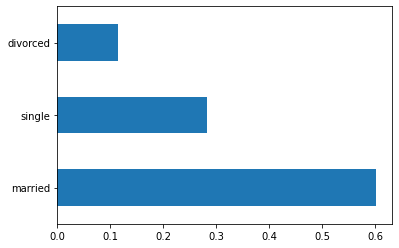

In [47]:
inp1.marital.value_counts(normalize=True).plot.barh()    # Horizontal bar chart for martial status
plt.show()

- It is clear from above chart that married people have been contacted the most by the bank.

In [50]:
# jobs also falls under unordered data for similar reasons as marital
inp1.job.value_counts(normalize=True)    # checking percentage of each job category

blue-collar      0.215274
management       0.209273
technician       0.168043
admin.           0.114369
services         0.091849
retired          0.050087
self-employed    0.034853
entrepreneur     0.032860
unemployed       0.028830
housemaid        0.027413
student          0.020770
unknown          0.006377
Name: job, dtype: float64

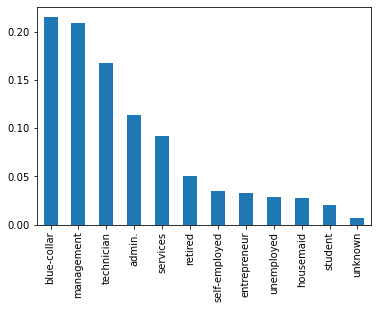

In [51]:
inp1.job.value_counts(normalize=True).plot.bar()    # Bar chart for job categories
plt.show()

- It is evident from above chart that bank have contacted people with blue collar jobs the most and contacted students the least. 

In [52]:
# education falls under ordered data as it follow a natural rank of order
inp1.education.value_counts(normalize=True)    # checking the percentage of each education category

secondary    0.513275
tertiary     0.294192
primary      0.151436
unknown      0.041097
Name: education, dtype: float64

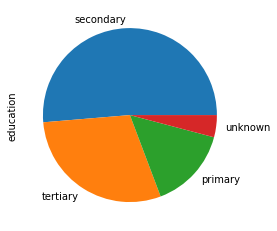

In [53]:
inp1.education.value_counts(normalize=True).plot.pie()    #plotting a pie chart for education categories
plt.show()

- above chart shows that the bank has primarily contacted those customers who have completed their secondary education.

In [54]:
# poutcome falls under ordered data for similar reason as education
inp1.poutcome.value_counts(normalize=True)    # checking the percentage of each poutcome category

unknown    0.817520
failure    0.108368
other      0.040721
success    0.033392
Name: poutcome, dtype: float64

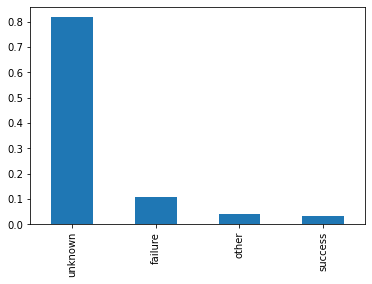

In [55]:
inp1.poutcome.value_counts(normalize=True).plot.bar()    # Bar chart for poutcome
plt.show()

- For the majority of the customers, the previous campaign has not been conducted. As we can see, 'unknown' has the major share within the 'poutcome' column.

In [59]:
# analysing the percentage excluding the unknown values
inp1[~(inp1.poutcome=='unknown')].poutcome.value_counts(normalize=True)

failure    0.593860
other      0.223153
success    0.182988
Name: poutcome, dtype: float64

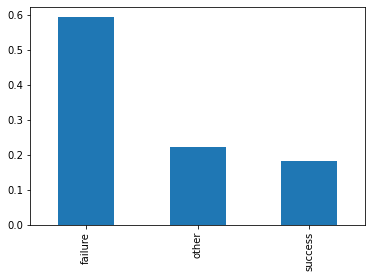

In [56]:
inp1[~(inp1.poutcome=='unknown')].poutcome.value_counts(normalize=True).plot.bar()
plt.show()

- For cases that were recorded aprox. 60% of poutcome had resulted in failure.

In [57]:
inp1.response.value_counts(normalize=True)    # checking percentage of each response category

no     0.882974
yes    0.117026
Name: response, dtype: float64

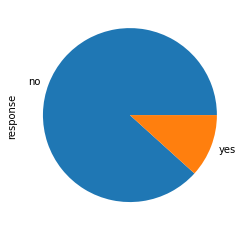

In [58]:
inp1.response.value_counts(normalize=True).plot.pie()    # pie chart for response
plt.show()

- As it is clear that majority had a negative response to the campaign.

##### Bivariate Analysis

In [60]:
# Checking for relation between 'age', 'balance' and 'salary' column

- We will try to analyse age, salary and balance columns using scatter plot, pair plot and correlation heat map as all mentioned columns are numerical in nature.

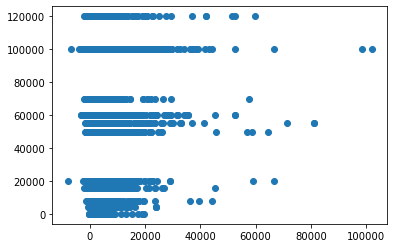

In [61]:
# Scatter plot of balance and salary column
plt.scatter(inp1.balance,inp1.salary)
plt.show()

- There isn't much association between the balance and salary column as visible in above scatter plot.

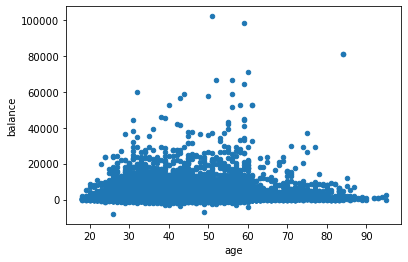

In [62]:
# Scatter plot of balance and age column
inp1.plot.scatter(x='age',y='balance')
plt.show()

- Here also there isn't a strong connection between the age and balance column. There is no certain pattern which is being followed.

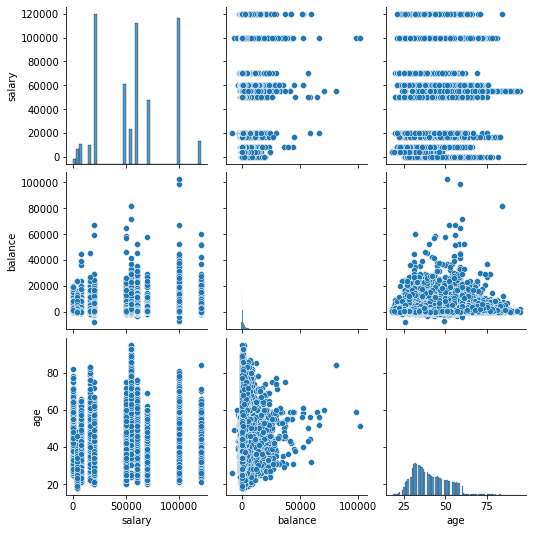

In [63]:
#pair plot of salary, balance and age columns to check and compare all three columns together
sns.pairplot(data=inp1,vars=['salary','balance','age'])
plt.show()

- From above pair plot as well it can be inferred that there is no correlation between the 'age', 'balance' and 'salary' variables.
- However we will try to quantify them with correlation values.

In [64]:
inp1[['age', 'salary', 'balance']].corr()

,age,salary,balance
age,1.000000,0.024513,0.097710
salary,0.024513,1.000000,0.055489
balance,0.097710,0.055489,1.000000


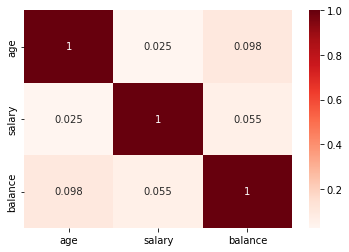

In [65]:
# Plotting a correlation Heat map to get a more condensed view
sns.heatmap(inp1[['age', 'salary', 'balance']].corr(), annot=True, cmap='Reds')
plt.show()

- It is more evident now that there isn't much going on here.

In [67]:
# Response is our target variable and is categorical in nature i.e. Yes or No.
# We also have numerical features, we'll try to analyse how Response variable is associated with these.

In [68]:
# We'll check statistical measures for different features as per the resposes recieved.

In [69]:
inp1.groupby('response')['salary'].mean()

response
no     56769.510482
yes    58780.510880
Name: salary, dtype: float64

In [70]:
inp1.groupby('response')['salary'].median()    # checking median as mean can be influenced

response
no     60000.0
yes    60000.0
Name: salary, dtype: float64

- As we can see above there is only a slight difference in the values or we can say almost same. This is not very convincing.

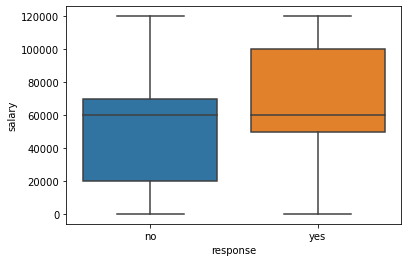

In [71]:
sns.boxplot(data=inp1, x='response', y='salary')    #box plot for response and salary to get better view of data
plt.show()

- As visible clearly in the box plot even the median is exactly same and there isn't much difference in mean as well, yet the interquartile range for customers who gave a positive response is on the higher salary side. This is actually true, because people who have higher salaries are more likely to invest in term deposits.

In [72]:
# now we will check Response and balance columns.
# we know that balance column is highly skewed as it has very high values, we'll try analysing with box plot.

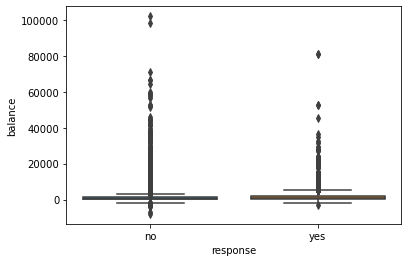

In [73]:
sns.boxplot(data=inp1, x='response', y='balance')
plt.show()

- As we can see the bulk is very close to zero and the high values are completely ruining the plot. We cannot really see anything with is box plot.
- Therefore Sometimes only a boxplot is not sufficient to draw insights, because of a high concentration of data or because of higher values in the data set

In [ ]:
# We'll check for statistical measures if we can get some insight

In [74]:
inp1.groupby('response')['balance'].mean()

response
no     1304.292281
yes    1804.681362
Name: balance, dtype: float64

In [75]:
inp1.groupby('response')['balance'].median()

response
no     417.0
yes    733.0
Name: balance, dtype: float64

- So mean balance of people who responded positively is slightly higher while comparing with median the difference is more. which is again true, because people who have higher balance in their bank accounts are more likely to invest in term deposits.

- This might be as we know mean is affected by outliers and we have outliers in balance column. To get better understanding we will check quartiles

In [76]:
# Defining a function to check 75th percentile
def p75(x):
    return np.quantile(x,0.75)

In [77]:
inp1.groupby('response')['balance'].aggregate(['mean','median',p75])

,mean,median,p75
response,,,
no,1304.292281,417.0,1345.0
yes,1804.681362,733.0,2159.0


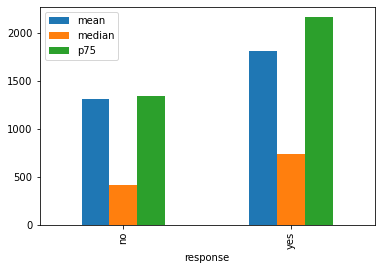

In [78]:
inp1.groupby('response')['balance'].aggregate(['mean','median',p75]).plot.bar()
plt.show()

- From above it is evident now that people with higher balance have responded positively and are likely to invest in Term Deposits.

In [ ]:
# analysing the education and salary columns

In [79]:
# comparing statistical fetures
inp1.groupby('education')['salary'].mean()

education
primary      34232.343910
secondary    49731.449525
tertiary     82880.249887
unknown      46529.633621
Name: salary, dtype: float64

In [80]:
inp1.groupby('education')['salary'].median()

education
primary       20000.0
secondary     55000.0
tertiary     100000.0
unknown       50000.0
Name: salary, dtype: float64

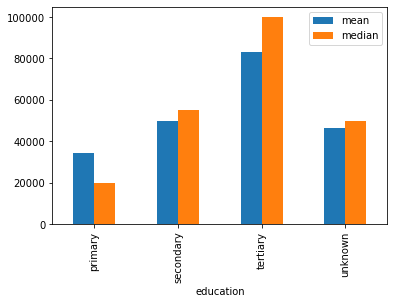

In [81]:
inp1.groupby('education')['salary'].aggregate(['mean','median']).plot.bar()
plt.show()

- From above it is evident that people with higher education especially 'tertiary' have higher salaries and people with higher salaries are likely to invest.

In [82]:
# analysing the job and salary columns

In [83]:
# comparing statistical fetures
inp1.groupby('job')['salary'].mean()

job
admin.            50000.0
blue-collar       20000.0
entrepreneur     120000.0
housemaid         16000.0
management       100000.0
retired           55000.0
self-employed     60000.0
services          70000.0
student            4000.0
technician        60000.0
unemployed         8000.0
unknown               0.0
Name: salary, dtype: float64

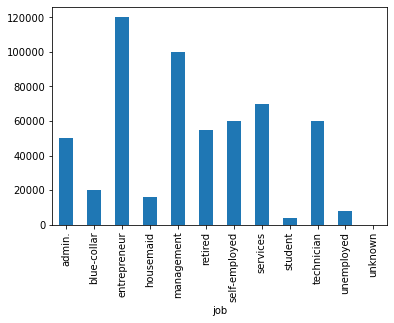

In [85]:
inp1.groupby('job')['salary'].mean().plot.bar()
plt.show()

- From abaove we can infer that the entrepreneur and management job categories emerge as the highest-paying jobs. The management job category is directly related to a higher education level, and hence, a higher salary is expected for such a job category. The lowest salary group is student, which is again true because they are not employed yet.

In [86]:
# Now we have other columns as well which are categorical in nature and Response is also categorical in nature.
# Hence we'll create a new variable having binary value for response i.e. 1 and 0 for yes and No.
# Since it'll become numerical in nature so it'll be easy to perform statistical measures.

In [90]:
inp1['response_flag'] = np.where(inp1.response=='yes',1,0)

In [91]:
inp1.response_flag.value_counts()

0    39876
1     5285
Name: response_flag, dtype: int64

In [92]:
inp1.response.value_counts()    # checking if values are correct 

no     39876
yes     5285
Name: response, dtype: int64

In [93]:
inp1.response_flag.value_counts(normalize=True)    # checking percentage

0    0.882974
1    0.117026
Name: response_flag, dtype: float64

In [94]:
inp1.response_flag.mean()

0.1170257523084077

- We have converted this in a convinient format. Now if we want to get any response rate for say education level we simply have to calculte the average value for this particular variable (response_flag).

In [96]:
# analysing education with response rate
inp1.groupby('education')['response_flag'].mean()

education
primary      0.086416
secondary    0.105608
tertiary     0.150083
unknown      0.135776
Name: response_flag, dtype: float64

- From above we can say that as the level of education increase the response rate also seems to increase. So with education people responding to campaign becomes higher.
- Hence the bank should contact people with higher education levels to effectively increase the positive response for opening a term deposit.

In [97]:
# analysing marital with response rate
inp1.groupby('marital')['response_flag'].mean()

marital
divorced    0.119469
married     0.101269
single      0.149554
Name: response_flag, dtype: float64

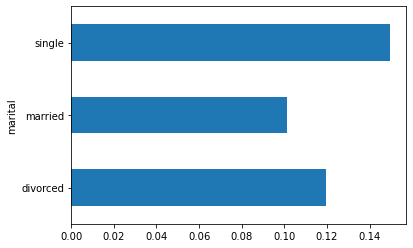

In [98]:
inp1.groupby('marital')['response_flag'].mean().plot.barh()
plt.show()

- Based on marital status analysis, it can be inferred that single individuals have a higher positive response rate. This could be due to various reasons: One reason could be that compared with other categories of customers, single individuals have available income to deposit in long-term savings accounts (term deposit). Hence, the campaign should target single customers.

In [99]:
# analysing loans with response rate

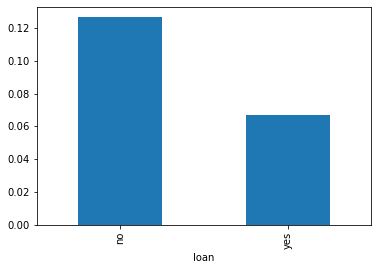

In [100]:
inp1.groupby('loan')['response_flag'].mean().plot.bar()
plt.show()

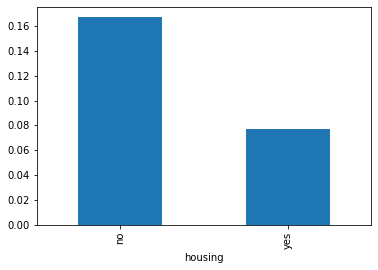

In [101]:
inp1.groupby('housing')['response_flag'].mean().plot.bar()
plt.show()

- Very interesting inference can be drawn from above information that people who have not purchased any housing or personal loan are more likely to open a term deposit account with the bank. This is true, probably because people who have already availed loans may not have the necessary funds to invest in a term deposit.

In [102]:
# analysing age with response rate

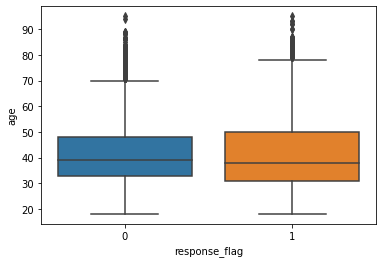

In [103]:
sns.boxplot(data=inp1, x='response_flag', y='age')
plt.show()

- It is observable the there is something going on with higher age as the upper fence is higher for people who have responded positively to the campaign.

In [104]:
# To understand this further we will create different age buckets to see response for different ages.

In [105]:
#create the buckets of <30, 30-40, 40-50 50-60 and 60+ from age column.
inp1['age_group'] = pd.cut(inp1.age,[0,30,40,50,60,9999], labels = ['<30','30-40','40-50','50-60','60+'])
inp1.age_group.value_counts()

30-40    17662
40-50    11231
50-60     8057
<30       7025
60+       1186
Name: age_group, dtype: int64

- age group analysis showed that people in the age group of 60+ or <30 are more likely to respond positively. It may be true for older people, since they want to invest through more secure investment methods such as term deposits to have a secure old age.

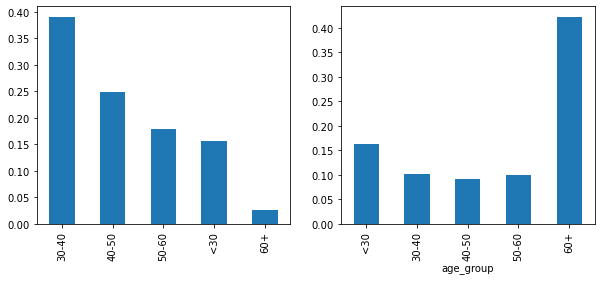

In [106]:
#plotting the percentage of each buckets and average values of response_flag in each buckets. plot in subplots.
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
inp1.age_group.value_counts(normalize=True).plot.bar()
plt.subplot(1,2,2)
inp1.groupby('age_group')['response_flag'].mean().plot.bar()
plt.show()

- From above we can observe that the bank has mostly contacted people in the age group of 30-50, and have made much less contact with people in the age group of 60+ (plot-I), although the chances of getting a positive response are higher from the people who are in the age group of 50+ or 60+ (as shown in plot-II). This is a very important insight that we can draw from this data set, i.e., the bank should target the people in the 50+ age group.

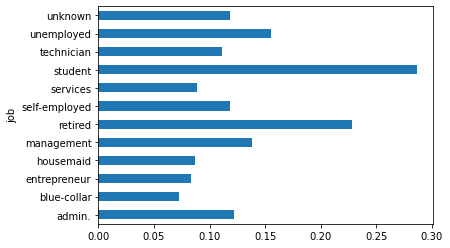

In [107]:
#analysing job categories with response_flag mean value.
inp1.groupby('job')['response_flag'].mean().plot.barh()
plt.show()

- We can observe that Student and retired peple have high response rate. Though students might be unemployed but this confirms our analysis for age group as retired people are generally above age of 60 and have high chances of responding positively.

##### Multivariate Analysis

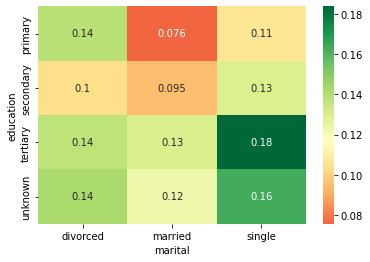

In [109]:
# Analysing the education vs marital vs response_flag
res = pd.pivot_table(data=inp1, index='education', columns='marital', values='response_flag')    #created a pivot table to get a condensed data of the three columns
sns.heatmap(res, annot=True, cmap='RdYlGn', center=0.117)    # Heat maps are best to plot relation having 2 or more variables
plt.show()
# overall response rate was 0.117, anything above this will show greener and anything below it will show redder.

- From above heat map we can see that people who are married and who have completed just their primary education are least likely to give a positive response on term deposits. This can be explained by the fact that people educated only up to the primary level are not aware of the benefits of term investments.  Also, married individuals need money to fulfil their daily needs, and they require cash-on-hand to buy the daily essentials; hence, they won't prefer investing in term deposits.

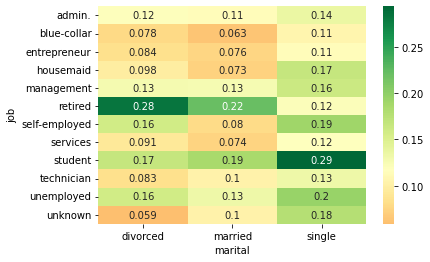

In [110]:
# Analysing the job vs marital vs response_flag
res1 = pd.pivot_table(data=inp1, index='job', columns='marital', values='response_flag')
sns.heatmap(res1, annot=True, cmap='RdYlGn', center=0.117)
plt.show()

- From above we can see that the combinations of married with blue-collar, entrepreneur and housemaid are least likely to go for term deposits. The highest rate of positive response came from students with single marital status.

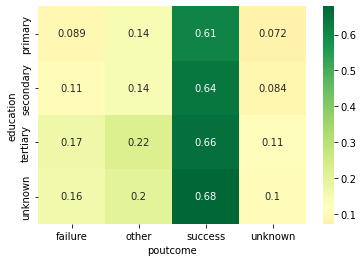

In [111]:
# Analysing the heat map of education vs poutcome vs response_flag.
res2 = pd.pivot_table(data=inp1, index='education', columns='poutcome', values='response_flag')
sns.heatmap(res2, annot=True, cmap='RdYlGn', center=0.117)
plt.show()

- We can see there is no red as such and the center is overall at 0.117. This average might not be correct. while analysing poutcome we are analysing people who have been contacted earlier, so for these people average may not be 0.117.

In [112]:
inp1[inp1.pdays>0].response_flag.mean()    # this is our actual center when considering poutcome

0.2307785593014795

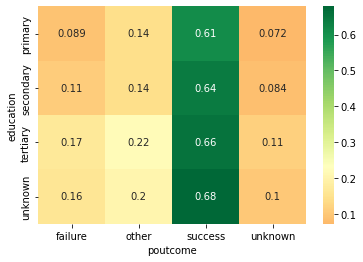

In [113]:
res2 = pd.pivot_table(data=inp1, index='education', columns='poutcome', values='response_flag')
sns.heatmap(res2, annot=True, cmap='RdYlGn', center=0.2308)
plt.show()

- The green part is where previosly there was a success and except for the success bucket all other are far lower than the center.
- So it can be inferred that people who had responed previously to the campaign are more like to respond again.

### Result

##### The bank should, therefore, consider below aspects before taking any decision.

- Single people with tertiary education are more likely to give a positive response to term deposit.
- People with high salary & balance and retired or we can say above age of 50 are also likely to respond.
- People who have responded in previous campaign are like to respond again.
- Married individuals and those who have completed up to primary education are least likely to give a positive response.